In [2]:
import numpy as np
import pandas as pd
import pyampute
from pyampute.ampute import MultivariateAmputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.linear_model import BayesianRidge
import os
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

# ivanovo_dataset with deleted  missing values 

In [3]:
X_full = np.genfromtxt(os.path.basename('/Desktop/GIT/Imputations/data_ivanovo.csv') , delimiter=';', skip_header=2)
df = pd.DataFrame(X_full)

df_cont = df.iloc[:, 6:18]
df_cont.columns = [str(i) for i in range(df_cont.shape[1])]
df_cont

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.681272,0.839077,1.699830,0.780747,1.965416,2.297007,-0.619881,-0.906753,1.710877,1.080780,0.195906,-0.762807
1,1.465668,1.619690,1.556676,2.193946,1.396400,-0.673438,1.092172,-0.193068,0.172220,0.592126,1.120988,0.020496
2,-1.584760,-0.790098,-1.020090,-0.475431,-1.069334,-1.267527,-1.400506,-1.412281,-0.606606,-2.146019,0.000772,1.699002
3,1.117047,1.467215,1.914561,1.304154,1.111892,0.910800,0.045425,0.936935,0.020254,-0.022903,0.058590,-0.091404
4,0.506962,2.299204,1.771407,0.519043,0.732548,-0.574423,1.730865,-1.114912,0.789582,1.266131,-0.136545,1.251401
...,...,...,...,...,...,...,...,...,...,...,...,...
1878,-0.887519,-0.280463,0.339870,-0.789475,-0.595155,-0.178363,0.453479,-0.490437,-0.331168,0.137173,-0.273861,0.468098
1879,-0.713209,-0.280463,-0.053802,-0.946497,-1.164170,-1.366541,0.151873,1.501937,-0.141210,0.389925,-0.729175,0.132397
1880,-0.364589,0.414796,-0.018014,-0.266068,-0.215811,-1.366541,-0.398112,-1.560966,-0.036733,-0.840134,-0.042591,1.475201
1881,-1.148984,-0.756122,-0.161168,-0.475431,-0.026139,0.019666,0.613152,0.520618,0.457157,0.802753,-0.317224,0.132397


Кол-во пропущенных значений в каждом столбце:

In [4]:
df_cont.isnull().sum()

0      0
1      4
2      0
3      0
4      0
5      0
6     11
7     11
8     11
9     11
10    11
11    12
dtype: int64

Пропущенных совсем немного, удаляем их:

In [5]:
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
df_cont = df.iloc[:, 6:18]
df_cont.columns = [str(i) for i in range(df_cont.shape[1])]
df_cont

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.681272,0.839077,1.699830,0.780747,1.965416,2.297007,-0.619881,-0.906753,1.710877,1.080780,0.195906,-0.762807
1,1.465668,1.619690,1.556676,2.193946,1.396400,-0.673438,1.092172,-0.193068,0.172220,0.592126,1.120988,0.020496
2,-1.584760,-0.790098,-1.020090,-0.475431,-1.069334,-1.267527,-1.400506,-1.412281,-0.606606,-2.146019,0.000772,1.699002
3,1.117047,1.467215,1.914561,1.304154,1.111892,0.910800,0.045425,0.936935,0.020254,-0.022903,0.058590,-0.091404
4,0.506962,2.299204,1.771407,0.519043,0.732548,-0.574423,1.730865,-1.114912,0.789582,1.266131,-0.136545,1.251401
...,...,...,...,...,...,...,...,...,...,...,...,...
1878,-0.887519,-0.280463,0.339870,-0.789475,-0.595155,-0.178363,0.453479,-0.490437,-0.331168,0.137173,-0.273861,0.468098
1879,-0.713209,-0.280463,-0.053802,-0.946497,-1.164170,-1.366541,0.151873,1.501937,-0.141210,0.389925,-0.729175,0.132397
1880,-0.364589,0.414796,-0.018014,-0.266068,-0.215811,-1.366541,-0.398112,-1.560966,-0.036733,-0.840134,-0.042591,1.475201
1881,-1.148984,-0.756122,-0.161168,-0.475431,-0.026139,0.019666,0.613152,0.520618,0.457157,0.802753,-0.317224,0.132397


## Data hist

In [6]:
# # Plot
# fig, axs = plt.subplots(4, 3, figsize=(15, 10))

# fig.suptitle('Ivanovo Dataset')
# for i in range(3):
#     for j in range(4):
#         n = j + i * 3
#         feature = features[n]
#         axs[i, j].scatter(X_full[feature], y_full, s=3, marker='o')
# #         axs[i, j].set_xlabel(feature)
# #         axs[i, j].set_ylabel('Q_disease')
# plt.tight_layout()
# plt.savefig(f"figures/q_disease_full.png", dpi=200)

In [1]:
df_cont.hist()
plt.show()

NameError: name 'df_cont' is not defined

## data corr

In [8]:
corr = df_cont.corr()
corr.style.background_gradient('coolwarm', axis = 1)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000000,0.382237,0.374438,0.427674,0.389335,0.078027,0.270943,0.036506,0.208591,0.357668,0.227889,-0.012598
1,0.382237,1.000000,0.819511,0.463341,0.422108,0.141224,0.212259,-0.222842,0.286739,0.194579,0.246950,0.302332
2,0.374438,0.819511,1.000000,0.493035,0.462493,0.149331,0.188395,-0.333780,0.366164,0.193523,0.284792,0.430566
3,0.427674,0.463341,0.493035,1.000000,0.802498,0.222252,0.238637,-0.120724,0.263525,0.248213,0.261403,0.226980
4,0.389335,0.422108,0.462493,0.802498,1.000000,0.278096,0.245654,-0.110451,0.258942,0.255937,0.245976,0.233664
5,0.078027,0.141224,0.149331,0.222252,0.278096,1.000000,0.043705,-0.052743,0.112726,0.063626,0.194491,0.028966
6,0.270943,0.212259,0.188395,0.238637,0.245654,0.043705,1.000000,0.031232,0.195923,0.797611,0.100046,0.104120
7,0.036506,-0.222842,-0.333780,-0.120724,-0.110451,-0.052743,0.031232,1.000000,-0.336466,0.223300,-0.142416,-0.327886
8,0.208591,0.286739,0.366164,0.263525,0.258942,0.112726,0.195923,-0.336466,1.000000,0.405077,0.309465,0.309841
9,0.357668,0.194579,0.193523,0.248213,0.255937,0.063626,0.797611,0.223300,0.405077,1.000000,0.140621,0.107027


## ICE

In [25]:
def ivanovo_ICE(n_cyc, num, varss): 
    propor = np.arange(0.1, 1, 0.1)
    df_ivanovo = df_cont.to_numpy()

    df_bias_mice = pd.DataFrame(columns = ['full', 'MCAR', 'MAR', 'MNAR'])

    for pr in propor:

        n = 0
        df_means = pd.DataFrame(columns = ['mean_full', 'mean_MCAR', 'mean_MAR', 'mean_MNAR'])

        for n in np.arange(n_cyc):

            X_full = df_ivanovo
            df_means.loc[n, 'mean_full'] = X_full[:,num].mean() 



            #___MCAR________

            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': varss, 'mechanism': "MCAR"} ],
                prop = pr
            )
            X_miss_MCAR = ma.fit_transform(X_full)

            imp_MCAR = IterativeImputer(max_iter=50, random_state = 0, estimator = BayesianRidge()).fit_transform(X_miss_MCAR)
            df_means.loc[n, 'mean_MCAR'] = imp_MCAR[:,num].mean()


            #___MAR________

            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': varss, 'mechanism': "MAR"} ],
                prop = pr
            )
            X_miss_MAR = ma.fit_transform(X_full)

            imp_MAR = IterativeImputer(max_iter=50, random_state = 0, estimator = BayesianRidge()).fit_transform(X_miss_MAR)
            df_means.loc[n, 'mean_MAR'] = imp_MAR[:,num].mean()


            #___MNAR________

            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': varss, 'weights': [0,0,0,0,0,0,1,0,0,0,0,0], 'mechanism': "MAR+MNAR"} ],
                prop = pr
            )
            X_miss_MNAR = ma.fit_transform(X_full)

            imp_MNAR = IterativeImputer(max_iter=50, random_state = 0, estimator = BayesianRidge()).fit_transform(X_miss_MNAR)
            df_means.loc[n, 'mean_MNAR'] = imp_MNAR[:,num].mean() 


        df_bias_mice.loc[pr, 'full'] = df_means['mean_full'].mean() - df_means['mean_full'].mean() 
        df_bias_mice.loc[pr, 'MCAR'] = df_means['mean_MCAR'].mean() - df_means['mean_full'].mean()
        df_bias_mice.loc[pr, 'MAR'] = df_means['mean_MAR'].mean() - df_means['mean_full'].mean()
        df_bias_mice.loc[pr, 'MNAR'] = df_means['mean_MNAR'].mean() - df_means['mean_full'].mean()


    return df_bias_mice

### (000...001)

Takes 3 minutes:

In [ ]:
tmp = ivanovo_ICE(n_cyc = 100, num = 10, varss = np.arange(0, 11, 1))

In [ ]:
tmp.plot(title = "00..001 by [11]. OX - missingness proportion, OY - bias")

Анализ bias-а по разным столбцам (ОЧЕНЬ! долго считается при n in 0...100 (+большая матрица данных)

In [ ]:
n_cyc = 100

In [14]:
mice1_by11 = ivanovo_MICE(n_cyc, num = 11, varss = np.arange(0, 11, 1))
mice1_by10 = ivanovo_MICE(n_cyc, num = 10, varss = np.arange(0, 11, 1))

= to ICE

In [27]:
ice1_by11 = ivanovo_ICE(n_cyc = 15, num = 11, varss = np.arange(0, 11, 1))
ice1_by10 = ivanovo_ICE(n_cyc = 15, num = 10, varss = np.arange(0, 11, 1))

In [15]:
mice1_by9 = ivanovo_MICE(n_cyc, num = 9, varss = np.arange(0, 11, 1))
mice1_by8 = ivanovo_MICE(n_cyc, num = 8, varss = np.arange(0, 11, 1))

In [17]:
mice1_by7 = ivanovo_MICE(n_cyc, num = 7, varss = np.arange(0, 11, 1))
mice1_by2 = ivanovo_MICE(n_cyc, num = 2, varss = np.arange(0, 11, 1))

<AxesSubplot:title={'center':'00..001 by [2]'}>

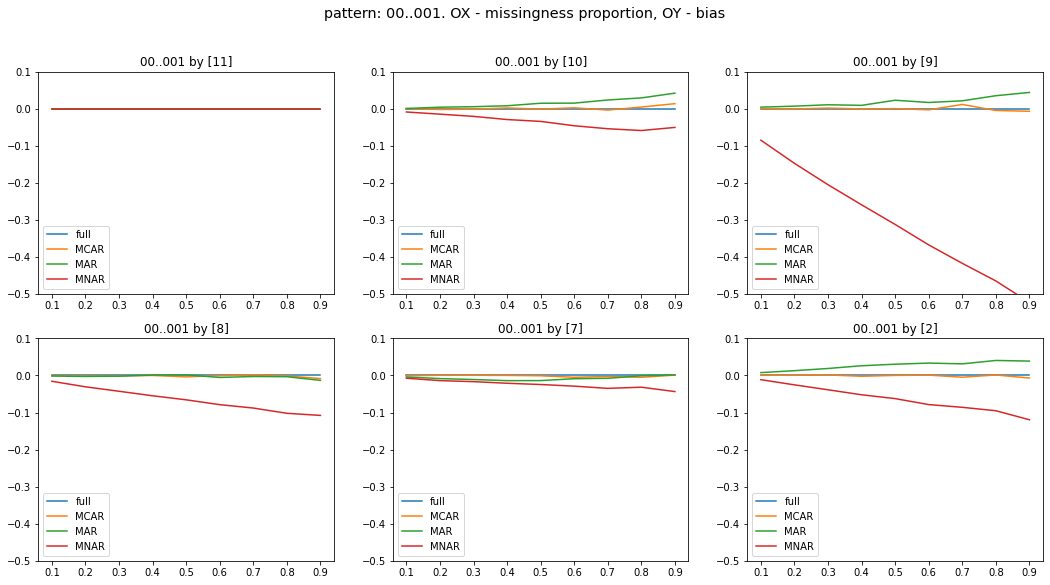

In [30]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(6 * 3,3 * 3))
[ax.set_ylim([-0.5, 0.1]) for ax in axes.flatten()]
fig.suptitle("pattern: 00..001. OX - missingness proportion, OY - bias", fontsize="x-large")

mice1_by11.plot(ax = axes[0,0],title = "00..001 by [11]")
mice1_by10.plot(ax = axes[0,1], title = "00..001 by [10]")
mice1_by9.plot(ax = axes[0,2], title = "00..001 by [9]")
mice1_by8.plot(ax = axes[1,0],title = "00..001 by [8]")
mice1_by7.plot(ax = axes[1,1], title = "00..001 by [7]")
mice1_by2.plot(ax = axes[1,2], title = "00..001 by [2]")

То же самое на меньшем числе циклов (графики менее гладкие):

<AxesSubplot:title={'center':'00..001 by [2]'}>

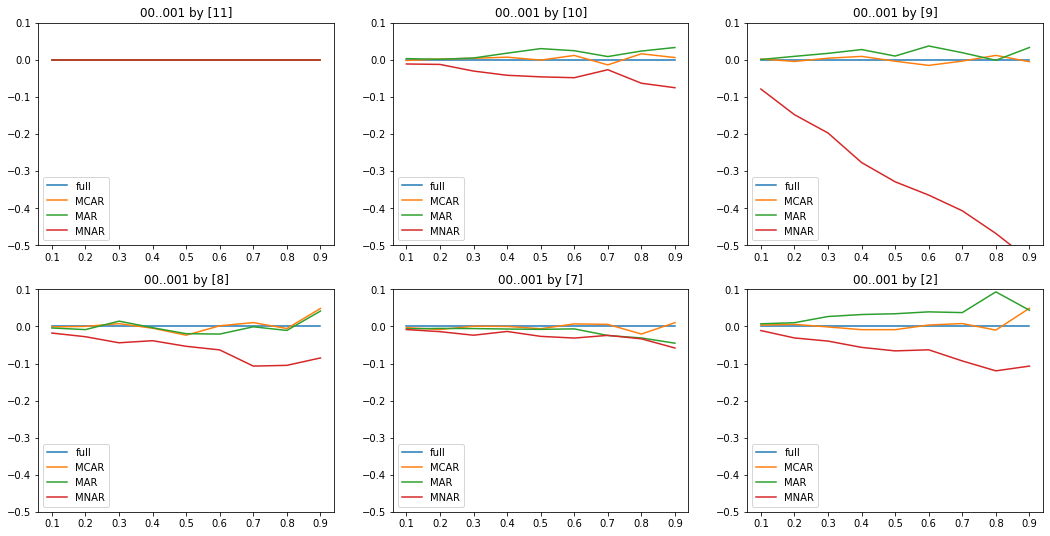

In [54]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(6 * 3,3 * 3))
[ax.set_ylim([-0.5, 0.1]) for ax in axes.flatten()]

mice1_by11.plot(ax = axes[0,0],title = "00..001 by [11]")
mice1_by10.plot(ax = axes[0,1], title = "00..001 by [10]")
mice1_by9.plot(ax = axes[0,2], title = "00..001 by [9]")
mice1_by8.plot(ax = axes[1,0],title = "00..001 by [8]")
mice1_by7.plot(ax = axes[1,1], title = "00..001 by [7]")
mice1_by2.plot(ax = axes[1,2], title = "00..001 by [2]")

### (000010000000)

In [23]:
n_cyc = 15

In [31]:
ice2_by11 = ivanovo_ICE(n_cyc, num = 11, varss = [ 0,1,2,3,  5,6,7,8,9,10,11])
ice2_by10 = ivanovo_ICE(n_cyc, num = 10, varss = [ 0,1,2,3,  5,6,7,8,9,10,11])

In [32]:
ice1_by9 = ivanovo_ICE(n_cyc, num = 9, varss = [ 0,1,2,3,  5,6,7,8,9,10,11])
ice1_by8 = ivanovo_ICE(n_cyc, num = 8, varss = [ 0,1,2,3,  5,6,7,8,9,10,11])

In [33]:
ice1_by7 = ivanovo_ICE(n_cyc, num = 7, varss = [ 0,1,2,3,  5,6,7,8,9,10,11])
ice1_by2 = ivanovo_ICE(n_cyc, num = 2, varss = [ 0,1,2,3,  5,6,7,8,9,10,11])

<AxesSubplot:title={'center':'000010.. by [2]'}>

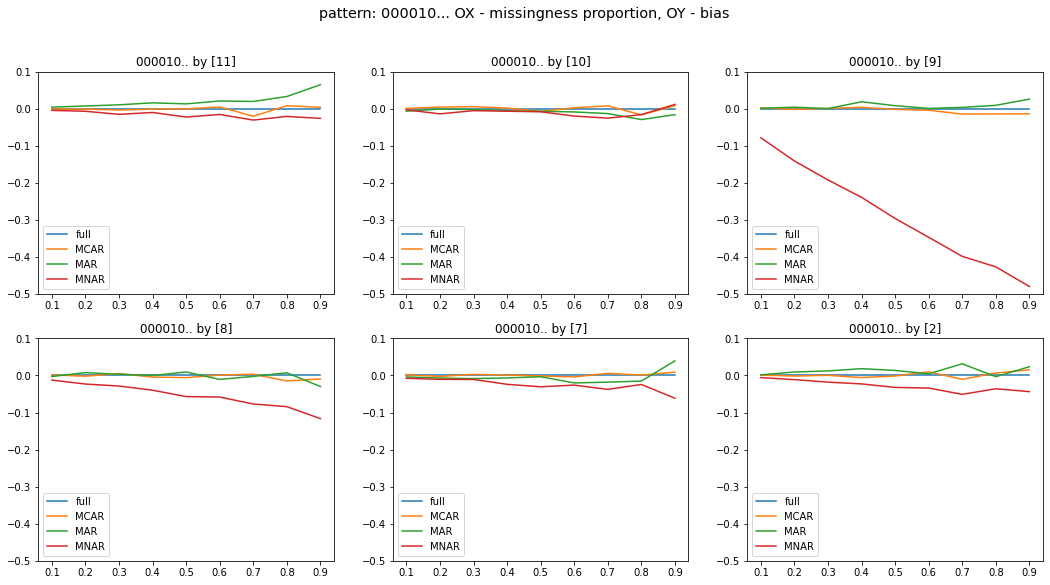

In [35]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(6 * 3,3 * 3))
[ax.set_ylim([-0.5, 0.1]) for ax in axes.flatten()]
fig.suptitle("pattern: 000010... OX - missingness proportion, OY - bias", fontsize="x-large")

ice2_by11.plot(ax = axes[0,0],title = "000010.. by [11]")
ice2_by10.plot(ax = axes[0,1], title = "000010.. by [10]")
ice1_by9.plot(ax = axes[0,2], title = "000010.. by [9]")
ice1_by8.plot(ax = axes[1,0],title = "000010.. by [8]")
ice1_by7.plot(ax = axes[1,1], title = "000010.. by [7]")
ice1_by2.plot(ax = axes[1,2], title = "000010.. by [2]")